In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import joblib

# Import des modèles
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
# Chargement des données traitées
X_train = pd.read_csv('../data/processed/X_train.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_train = pd.read_csv('../data/processed/y_train.csv').values.ravel() # .ravel() pour en faire un tableau 1D
y_test = pd.read_csv('../data/processed/y_test.csv').values.ravel()

print(f"Train : {X_train.shape}")
print(f"Test  : {X_test.shape}")

Train : (404164, 10)
Test  : (101042, 10)


In [ ]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
baseline_score = dummy.score(X_test, y_test)

print(f"Score de base (Baseline) : {baseline_score:.2%}")

Score de base (Baseline) : 55.52%
Si nos modèles font moins que ça, ils sont inutiles.


=== 1. REGRESSION LOGISTIQUE ===
Accuracy : 83.38%
              precision    recall  f1-score   support

           0       0.81      0.82      0.82     44943
           1       0.86      0.84      0.85     56099

    accuracy                           0.83    101042
   macro avg       0.83      0.83      0.83    101042
weighted avg       0.83      0.83      0.83    101042



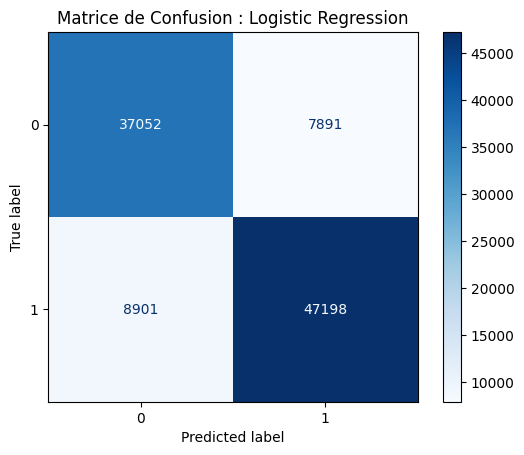

In [4]:
print("=== 1. REGRESSION LOGISTIQUE ===")
# Entraînement
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

# Prédiction
y_pred_log = log_model.predict(X_test)

# Évaluation Chiffrée
print(f"Accuracy : {accuracy_score(y_test, y_pred_log):.2%}")
print(classification_report(y_test, y_pred_log))

# Matrice de Confusion
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log, cmap='Blues')
plt.title("Matrice de Confusion : Logistic Regression")
plt.show()

=== 2. NAIVE BAYES ===
Accuracy : 87.28%
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     44943
           1       0.90      0.87      0.88     56099

    accuracy                           0.87    101042
   macro avg       0.87      0.87      0.87    101042
weighted avg       0.87      0.87      0.87    101042



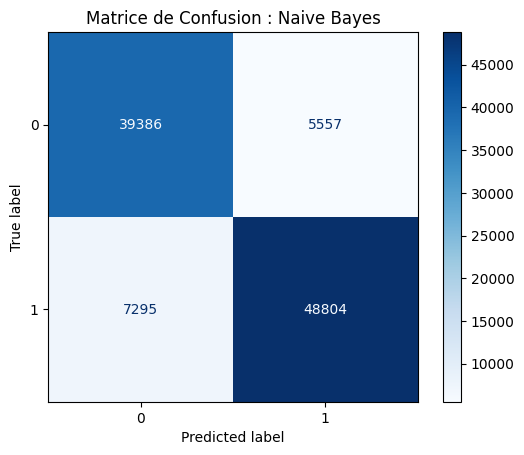

In [5]:
print("=== 2. NAIVE BAYES ===")
# Entraînement
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Prédiction
y_pred_nb = nb_model.predict(X_test)

# Évaluation Chiffrée
print(f"Accuracy : {accuracy_score(y_test, y_pred_nb):.2%}")
print(classification_report(y_test, y_pred_nb))

# Matrice de Confusion
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb, cmap='Blues')
plt.title("Matrice de Confusion : Naive Bayes")
plt.show()

=== 3. KNN (K-Nearest Neighbors) ===
Accuracy : 89.97%
              precision    recall  f1-score   support

           0       0.90      0.87      0.89     44943
           1       0.90      0.92      0.91     56099

    accuracy                           0.90    101042
   macro avg       0.90      0.90      0.90    101042
weighted avg       0.90      0.90      0.90    101042



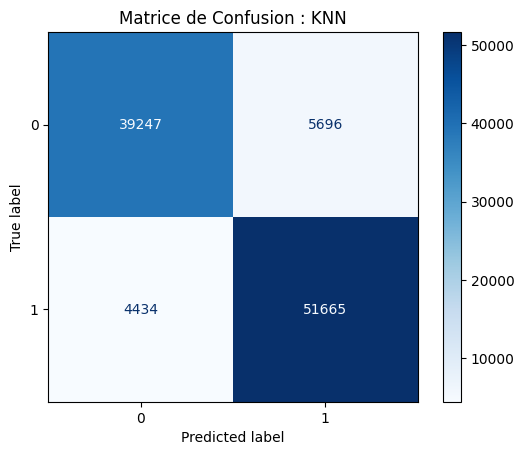

In [6]:
print("=== 3. KNN (K-Nearest Neighbors) ===")
# Entraînement
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Prédiction
y_pred_knn = knn_model.predict(X_test)

# Évaluation Chiffrée
print(f"Accuracy : {accuracy_score(y_test, y_pred_knn):.2%}")
print(classification_report(y_test, y_pred_knn))

# Matrice de Confusion
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, cmap='Blues')
plt.title("Matrice de Confusion : KNN")
plt.show()

=== 4. DECISION TREE ===
Accuracy : 88.36%
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     44943
           1       0.90      0.89      0.89     56099

    accuracy                           0.88    101042
   macro avg       0.88      0.88      0.88    101042
weighted avg       0.88      0.88      0.88    101042



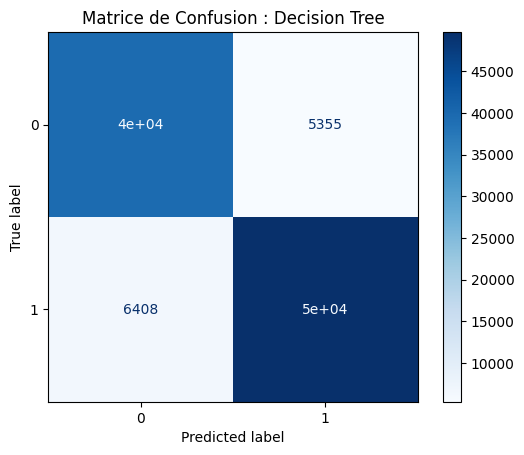

In [7]:
print("=== 4. DECISION TREE ===")
# Entraînement
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Prédiction
y_pred_dt = dt_model.predict(X_test)

# Évaluation Chiffrée
print(f"Accuracy : {accuracy_score(y_test, y_pred_dt):.2%}")
print(classification_report(y_test, y_pred_dt))

# Matrice de Confusion
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, cmap='Blues') 
plt.title("Matrice de Confusion : Decision Tree")
plt.show()

=== 5. RANDOM FOREST ===
Accuracy : 93.69%
              precision    recall  f1-score   support

           0       1.00      0.86      0.92     44943
           1       0.90      1.00      0.95     56099

    accuracy                           0.94    101042
   macro avg       0.95      0.93      0.93    101042
weighted avg       0.94      0.94      0.94    101042



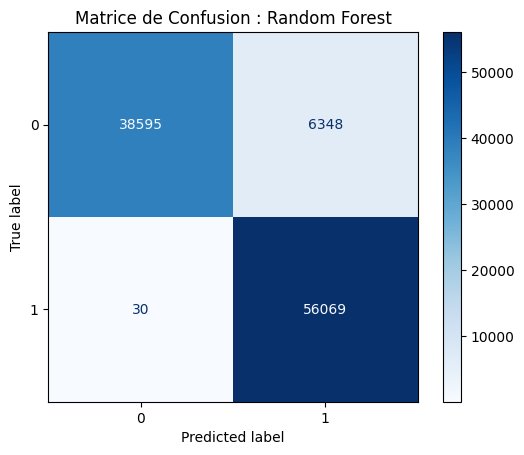

In [8]:
print("=== 5. RANDOM FOREST ===")
# Entraînement
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prédiction
y_pred_rf = rf_model.predict(X_test)

# Évaluation Chiffrée
print(f"Accuracy : {accuracy_score(y_test, y_pred_rf):.2%}")
print(classification_report(y_test, y_pred_rf))

# Matrice de Confusion
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap='Blues')
plt.title("Matrice de Confusion : Random Forest")
plt.show()

=== 7. XGBOOST ===
Accuracy : 93.48%
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     44943
           1       0.90      0.99      0.94     56099

    accuracy                           0.93    101042
   macro avg       0.95      0.93      0.93    101042
weighted avg       0.94      0.93      0.93    101042



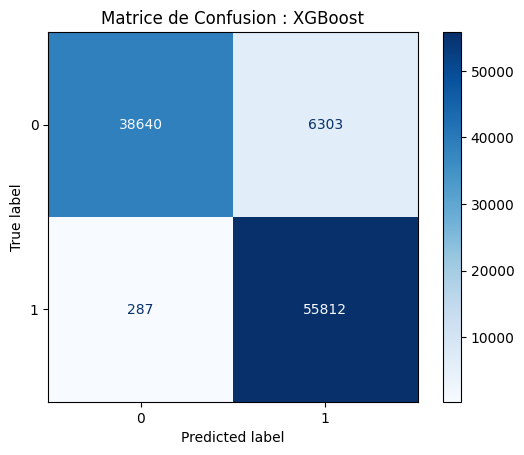

In [9]:
from xgboost import XGBClassifier

print("=== 7. XGBOOST ===")
# Initialisation
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Entraînement
xgb_model.fit(X_train, y_train)

# Prédiction
y_pred_xgb = xgb_model.predict(X_test)

# Évaluation
print(f"Accuracy : {accuracy_score(y_test, y_pred_xgb):.2%}")
print(classification_report(y_test, y_pred_xgb))

# Matrice de Confusion
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, cmap='Blues')
plt.title("Matrice de Confusion : XGBoost")
plt.show()

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score

# On regroupe les prédictions dans une liste
predictions_list = [
    ("Logistic Regression", y_pred_log),
    ("Naive Bayes",         y_pred_nb),
    ("KNN",                 y_pred_knn),
    ("Decision Tree",       y_pred_dt),
    ("Random Forest",       y_pred_rf),
    ("XGBoost",             y_pred_xgb)
]

results = []

# On boucle pour calculer toutes les métriques d'un coup
for model_name, y_pred in predictions_list:
    results.append({
        'Modèle': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred), 
        'Recall': recall_score(y_test, y_pred),       
        'F1-Score': f1_score(y_test, y_pred)          
    })

# Création du DataFrame final
df_results = pd.DataFrame(results)

# Affichage trié par Accuracy (ou par Recall si tu préfères)
print("--- CLASSEMENT FINAL ---")
# On arrondit à 4 chiffres après la virgule pour la lisibilité
display(df_results.sort_values(by='Accuracy', ascending=False).round(4))

--- CLASSEMENT FINAL ---


,Modèle,Accuracy,Precision,Recall,F1-Score
4,Random Forest,0.9369,0.8983,0.9995,0.9462
5,XGBoost,0.9348,0.8985,0.9949,0.9443
2,KNN,0.8997,0.9007,0.9210,0.9107
3,Decision Tree,0.8836,0.9027,0.8858,0.8942
1,Naive Bayes,0.8728,0.8978,0.8700,0.8837
0,Logistic Regression,0.8338,0.8568,0.8413,0.8490


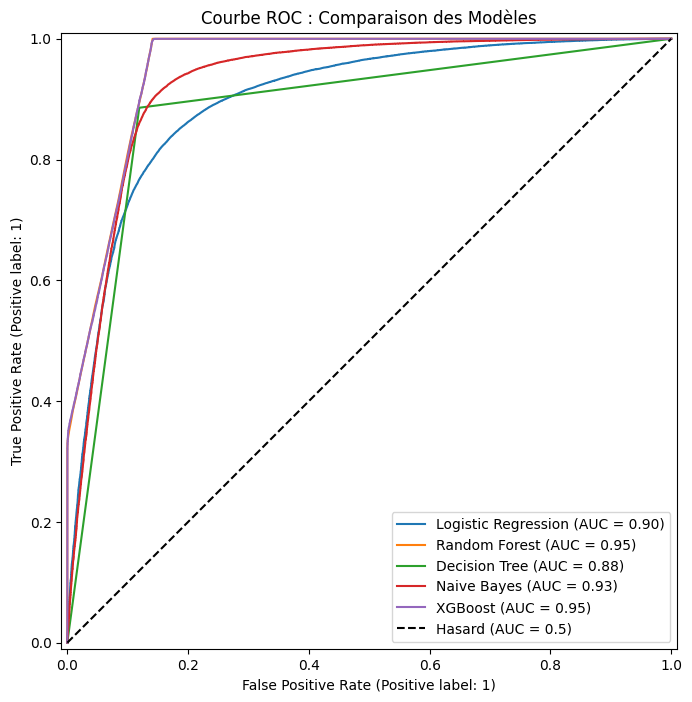

In [11]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(10, 8))

# On trace la courbe pour chaque modèle
models_to_plot = [
    ("Logistic Regression", log_model),
    ("Random Forest", rf_model),
    ("Decision Tree", dt_model),
    ("Naive Bayes", nb_model),
    ("XGBoost", xgb_model)
]

for name, model in models_to_plot:
    RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax, name=name)

plt.title("Courbe ROC : Comparaison des Modèles")
# La ligne en pointillé représente le hasard (aucun pouvoir prédictif)
plt.plot([0, 1], [0, 1], "k--", label="Hasard (AUC = 0.5)")
plt.legend()
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_1680\2978939501.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=df_importances, palette='viridis')


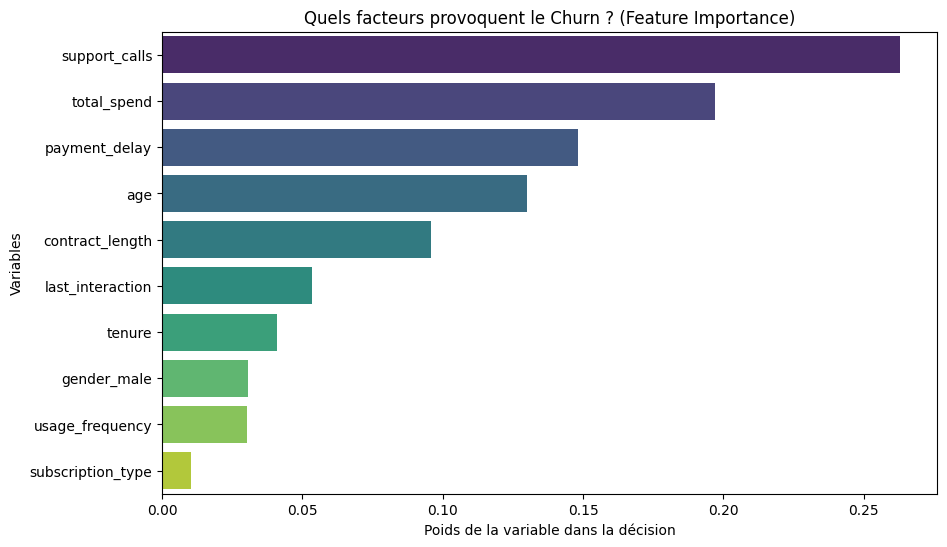

In [12]:
# On récupère le modèle Random Forest déjà entraîné
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Création d'un DataFrame pour le tri
df_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
df_importances = df_importances.sort_values(by='Importance', ascending=False)

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_importances, palette='viridis')
plt.title("Quels facteurs provoquent le Churn ? (Feature Importance)")
plt.xlabel("Poids de la variable dans la décision")
plt.ylabel("Variables")
plt.show()

In [13]:
# Sauvegarde du modèle Random Forest 
joblib.dump(rf_model, '../models/rf_model.pkl')

['../models/rf_model.pkl']